In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from glob import glob
import matplotlib.colors as mcolors
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
np.set_printoptions(formatter={'float': lambda x: " | {0:0.2f}".format(x)})
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:

"""
msg_1 - message sent by agent 1
msg_2 - "                   " 2
probs_1 - the underlying probability vector for every bit in message 1
probs_2 - the underlying probability vector for every bit in message 2

msg_1_ent - entropy of message 1 (calculated on probs_1)
msg_2_ent - entropy of message 2 (calculated on probs_2)

non_blank_partition - 
  1 = partition 1 is non blank
  2 = partition 2 is non blank
  0 = both partitions are non blank

p - part of the image that agent1 sees (for agent2 it is 1-p)

caption - correct caption
shape - one of ['circle', 'cross', 'ellipse', 'pentagon', 'rectangle', 'semicircle', 'square', 'triangle']
color - one of ['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow']

texts - all 10 descriptions
texts_shapes - shape for all 10 descs
texts_color - colors "              "

correct - was the trial succeful (both players guessing right)
"""

'\nmsg_1 - message sent by agent 1\nmsg_2 - "                   " 2\nprobs_1 - the underlying probability vector for every bit in message 1\nprobs_2 - the underlying probability vector for every bit in message 2\n\nmsg_1_ent - entropy of message 1 (calculated on probs_1)\nmsg_2_ent - entropy of message 2 (calculated on probs_2)\n\nnon_blank_partition - \n  1 = partition 1 is non blank\n  2 = partition 2 is non blank\n  0 = both partitions are non blank\n\np - part of the image that agent1 sees (for agent2 it is 1-p)\n\ncaption - correct caption\nshape - one of [\'circle\', \'cross\', \'ellipse\', \'pentagon\', \'rectangle\', \'semicircle\', \'square\', \'triangle\']\ncolor - one of [\'blue\', \'cyan\', \'gray\', \'green\', \'magenta\', \'red\', \'yellow\']\n\ntexts - all 10 descriptions\ntexts_shapes - shape for all 10 descs\ntexts_color - colors "              "\n\ncorrect - was the trial succeful (both players guessing right)\n'

In [2]:
shapes = ['circle', 'cross', 'ellipse', 'pentagon', 'rectangle', 'semicircle', 'square', 'triangle']
colors = ['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow']

df = pd.DataFrame()
for p in glob(" ../languages/pool8_msg_10_300k_steps*"):
  with open(p) as f:
      task_data = json.load(f)
  df = df.append(pd.DataFrame(task_data))

In [ ]:
all_msg = np.array(df.msg_1.append(df.msg_2).tolist()).squeeze()
all_msg.shape

(14000, 10)

In [ ]:
k = 8
km = KMeans(k)
res = km.fit_predict(all_msg)
tsne = TSNE(2)
tsne_msg = tsne.fit_transform(all_msg)

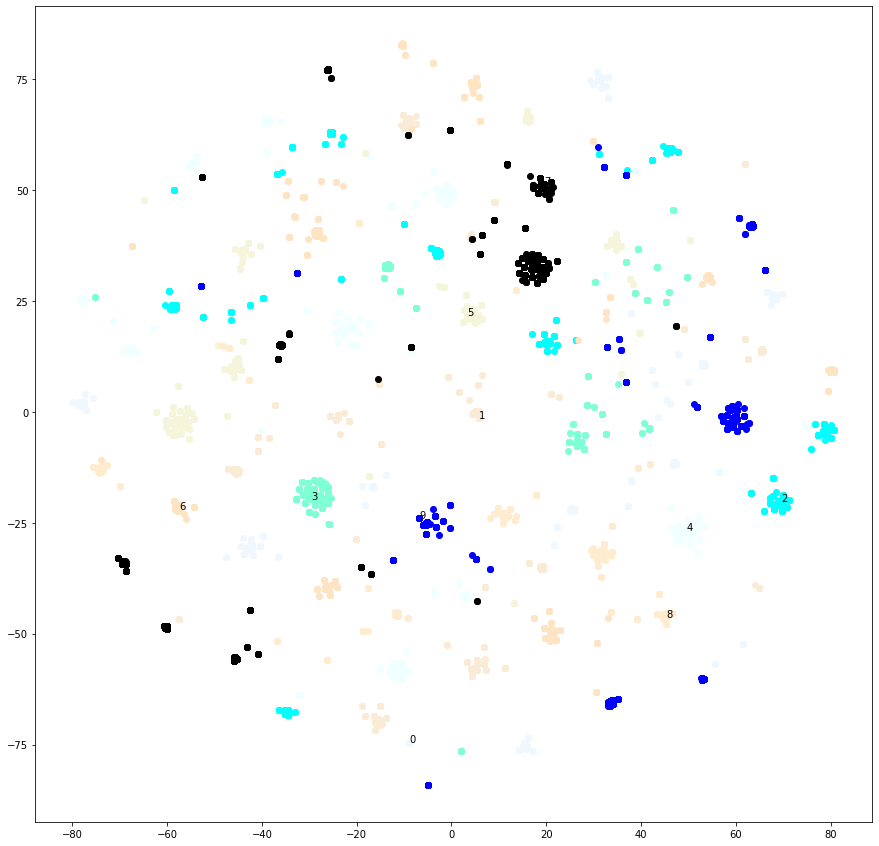

In [ ]:
plt.figure(figsize=(15,15))
for i, c in zip(range(k), mcolors.cnames):
  d = tsne_msg[res==i]
  plt.scatter(d[:, 0], d[:,1], label=i, color=c)
  plt.annotate(str(i), d[0])

In [ ]:
df1 = df[(df.non_blank_partition.isin([0,1])) & (df.correct)][['msg_1', 'probs_1', 'p', 'shape', 'color', 'correct']].rename(columns={'msg_1':'msg', 'probs_1':'prob'})
df2 = df[(df.non_blank_partition.isin([0,2])) & (df.correct)][['msg_2', 'probs_2', 'p', 'shape', 'color', 'correct']].rename(columns={'msg_2':'msg', 'probs_2':'prob'})
df2.p = 1-df2.p
msg_df = pd.concat([df1, df2])

df1 = df[df.non_blank_partition.isin([2])][['msg_1', 'probs_1', 'p', 'shape', 'color', 'correct']].rename(columns={'msg_1':'msg', 'probs_1':'prob'})
df2 = df[df.non_blank_partition.isin([1])][['msg_2', 'probs_2', 'p', 'shape', 'color', 'correct']].rename(columns={'msg_2':'msg', 'probs_2':'prob'})
df2.p = 1-df2.p
blank_msg_df = pd.concat([df1, df2])

In [ ]:
all_msg = np.array(msg_df.msg.tolist()).squeeze()
all_prob = np.array(msg_df.prob.tolist()).squeeze()
tsne_msg = TSNE(2).fit_transform(all_msg)

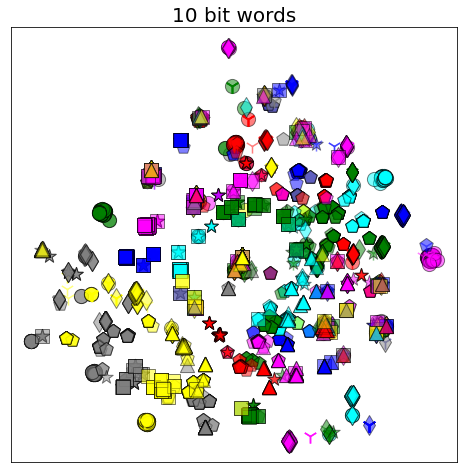

In [ ]:
shapes = ['circle', 'cross', 'ellipse', 'pentagon', 'rectangle', 'semicircle', 'square', 'triangle']
shapes_ = ['o',       'p',      "1",        "p",        "*",          "d",        "s",      "^"]
colors = ['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow']

import matplotlib.lines as mlines
legend = []
for c, s, s_name in zip(['blue', 'cyan', 'gray', 'green', 'magenta', 'red', 'yellow', 'blue'],
                shapes_,
                shapes):
  legend.append(mlines.Line2D([], [], color=c, marker=s, linestyle='None',
                          markersize=10, label=f'{c} {s_name}', markeredgecolor='k'))

plt.figure(figsize=(8,8))
for s, s_ in zip(shapes, shapes_):
  for c in colors:
    d = tsne_msg[(msg_df["shape"]==s) & (msg_df["color"]==c)]
    plt.scatter(d[:, 0], d[:,1], label=f"{c} {s}", color=c, marker=s_, edgecolors="k", s=200, alpha=0.5)
# plt.legend(handles=legend)
plt.xticks([])
plt.yticks([])
plt.title("10 bit words", fontdict={'fontsize':20})
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,circle,cross,ellipse,pentagon,rectangle,semicircle,square,triangle
f1_comp,0.715517,0.813115,0.575875,0.661538,0.500000,0.582441,0.000000,0.561086
recall_comp,0.572414,0.738095,0.528571,0.609929,0.834646,0.809524,0.000000,0.442857
precision_comp,0.954023,0.905109,0.632479,0.722689,0.356902,0.454849,0.000000,0.765432
f1_not_comp,0.656977,0.778481,0.586873,0.687500,0.587156,0.606481,0.621053,0.694981
recall_not_comp,0.779310,0.732143,0.542857,0.624113,0.503937,0.779762,0.546296,0.642857
precision_not_comp,0.567839,0.831081,0.638655,0.765217,0.703297,0.496212,0.719512,0.756303



comp feature importances [ | 0.00  | 0.00  | 0.19  | 0.00  | 0.23  | 0.00  | 0.21  | 0.00  | 0.06
  | 0.31]

not comp feature importances [ | 0.02  | 0.05  | 0.15  | 0.05  | 0.19  | 0.04  | 0.15  | 0.05  | 0.07
  | 0.24]

average f1 comp 0.5511966287173122
average f1 not comp 0.6524376393825922


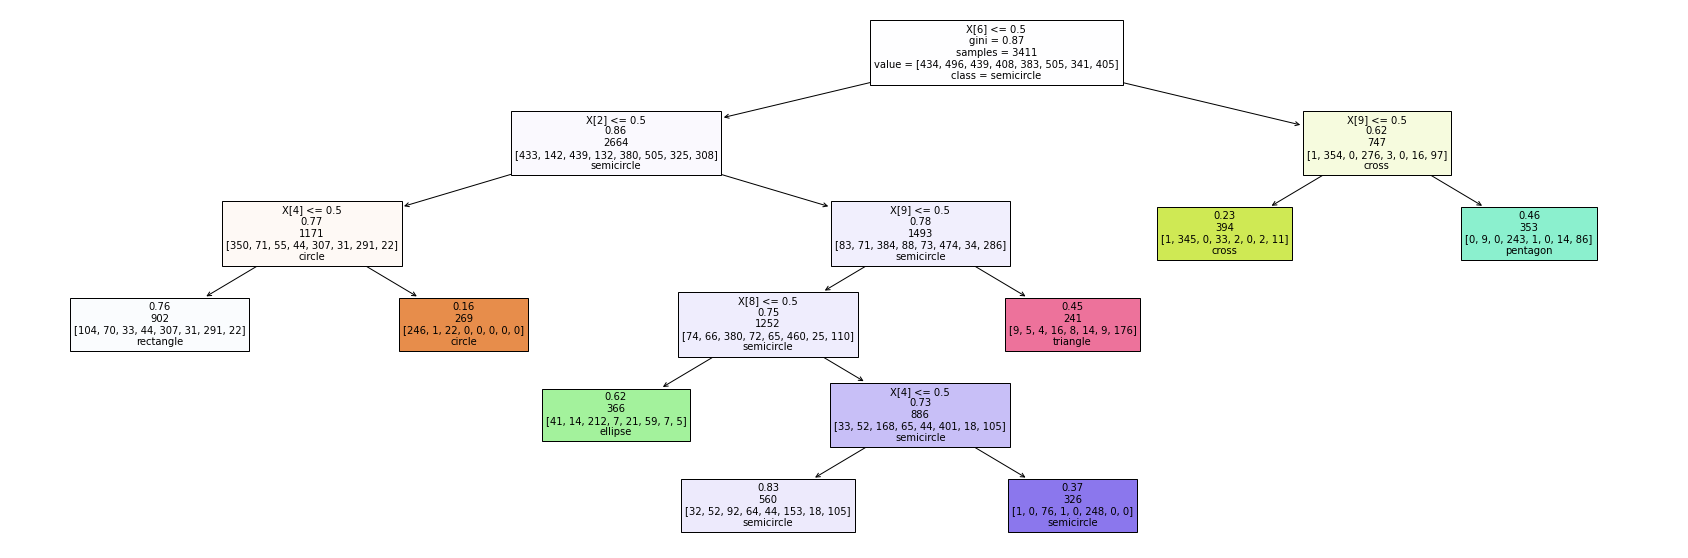

In [ ]:
df_ = msg_df.dropna(axis=0, subset=["shape"])
# df_ = msg_df.fillna('None')
y = df_["shape"]
X = np.array(df_.msg.tolist()).squeeze()
X_t, X_te, y_t, y_te = train_test_split(X[:, :], y, test_size=0.25)

tree = DecisionTreeClassifier(max_leaf_nodes=8)
tree.fit(X_t, y_t)
y_ = tree.predict(X_te)

tree_no_limit = DecisionTreeClassifier()
tree_no_limit.fit(X_t, y_t)
y_no_limit = tree_no_limit.predict(X_te)

res = pd.DataFrame(np.vstack([f1_score(y_te, y_, average=None),
                              recall_score(y_te, y_, average=None),
                              precision_score(y_te, y_, average=None),
                              
                              f1_score(y_te, y_no_limit, average=None),
                              recall_score(y_te, y_no_limit, average=None),
                              precision_score(y_te, y_no_limit, average=None)]),
                    index=["f1_comp", "recall_comp", "precision_comp", "f1_not_comp", "recall_not_comp", "precision_not_comp"], columns=tree.classes_)
display(res)
print(f"\ncomp feature importances", tree.feature_importances_)
print(f"\nnot comp feature importances", tree_no_limit.feature_importances_)

print("\naverage f1 comp", res.loc['f1_comp'].mean())
print("average f1 not comp", res.loc['f1_not_comp'].mean())

plt.figure(figsize=(30,10))
plt.title("comp tree")
plot_tree(tree, fontsize=10, filled=True, class_names=tree.classes_, label='root', precision=2 )
plt.show()

,blue,cyan,gray,green,magenta,red,yellow
f1_comp,0.734082,0.797814,0.785498,0.757962,0.770992,0.456522,0.779412
recall_comp,0.590361,0.730000,0.656566,0.623037,0.627329,1.000000,0.642424
precision_comp,0.970297,0.879518,0.977444,0.967480,1.000000,0.295775,0.990654
f1_not_comp,0.678899,0.784661,0.754011,0.717172,0.689024,0.586466,0.778157
recall_not_comp,0.668675,0.665000,0.712121,0.743455,0.701863,0.795918,0.690909
precision_not_comp,0.689441,0.956835,0.801136,0.692683,0.676647,0.464286,0.890625



comp feature importances [ | 0.17  | 0.53  | 0.00  | 0.00  | 0.00  | 0.19  | 0.00  | 0.11  | 0.00
  | 0.00]

not comp feature importances [ | 0.14  | 0.53  | 0.01  | 0.01  | 0.00  | 0.15  | 0.01  | 0.12  | 0.01
  | 0.01]

average f1 comp 0.7260403925382887
average f1 not comp 0.7126271163048299


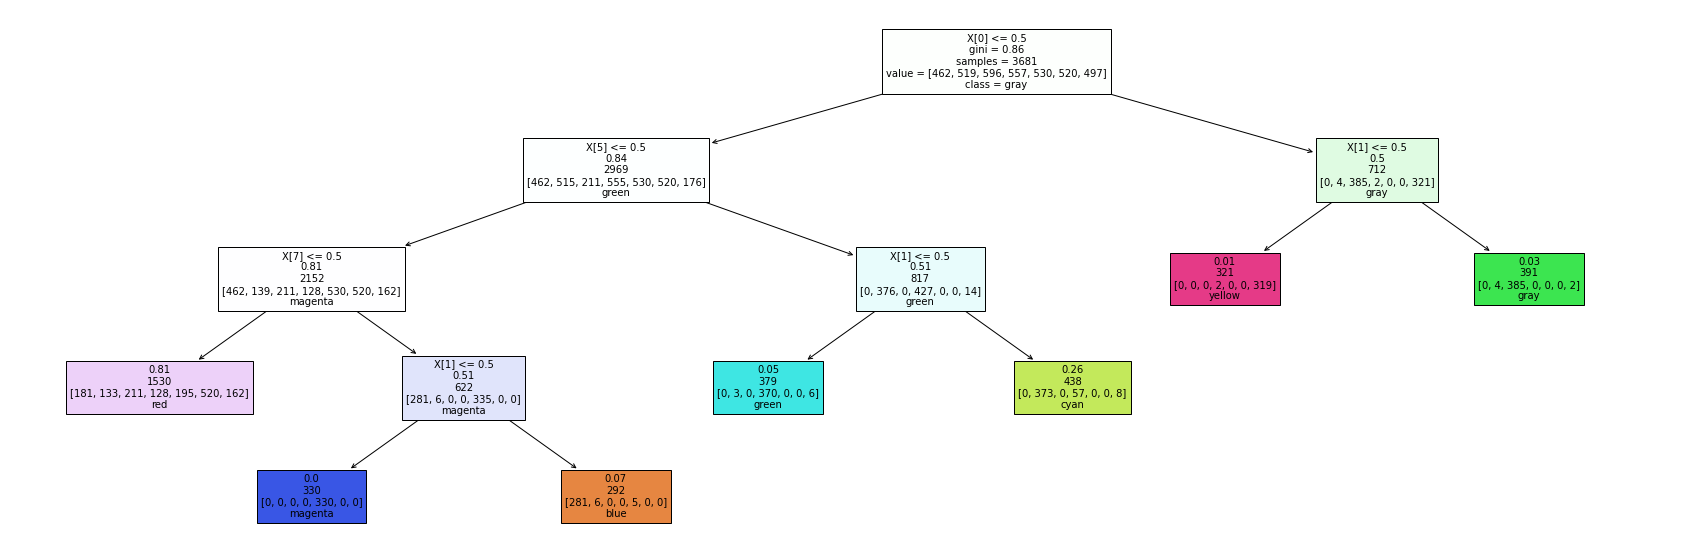

In [ ]:
df_ = msg_df.dropna(axis=0, subset=["color"])
y = df_["color"]
X = np.array(df_.msg.tolist()).squeeze()
X_t, X_te, y_t, y_te = train_test_split(X[:, :], y, test_size=0.25)

tree = DecisionTreeClassifier(max_leaf_nodes=7)
tree.fit(X_t, y_t)
y_ = tree.predict(X_te)

tree_no_limit = DecisionTreeClassifier()
tree_no_limit.fit(X_t, y_t)
y_no_limit = tree_no_limit.predict(X_te)

res = pd.DataFrame(np.vstack([f1_score(y_te, y_, average=None),
                              recall_score(y_te, y_, average=None),
                              precision_score(y_te, y_, average=None),
                              
                              f1_score(y_te, y_no_limit, average=None),
                              recall_score(y_te, y_no_limit, average=None),
                              precision_score(y_te, y_no_limit, average=None)]),
                    index=["f1_comp", "recall_comp", "precision_comp", "f1_not_comp", "recall_not_comp", "precision_not_comp"], columns=tree.classes_)
display(res)
print(f"\ncomp feature importances", tree.feature_importances_)
print(f"\nnot comp feature importances", tree_no_limit.feature_importances_)

print("\naverage f1 comp", res.loc['f1_comp'].mean())
print("average f1 not comp", res.loc['f1_not_comp'].mean())

plt.figure(figsize=(30,10))
plt.title("comp tree")
plot_tree(tree, fontsize=10, filled=True, class_names=tree.classes_, label='root', precision=2 )
plt.show()

In [ ]:
df_ = msg_df.dropna(axis=0, subset=["color", "shape"])
y = df_["color"]+df_["shape"]
X = np.array(df_.msg.tolist()).squeeze()
X_t, X_te, y_t, y_te = train_test_split(X[:, :], y, test_size=0.25)

tree = DecisionTreeClassifier(max_leaf_nodes=7*8)
tree.fit(X_t, y_t)
y_ = tree.predict(X_te)

tree_no_limit = DecisionTreeClassifier()
tree_no_limit.fit(X_t, y_t)
y_no_limit = tree_no_limit.predict(X_te)

res = pd.DataFrame(np.vstack([f1_score(y_te, y_, average=None),
                              recall_score(y_te, y_, average=None),
                              precision_score(y_te, y_, average=None),
                              
                              f1_score(y_te, y_no_limit, average=None),
                              recall_score(y_te, y_no_limit, average=None),
                              precision_score(y_te, y_no_limit, average=None)]),
                    index=["f1_comp", "recall_comp", "precision_comp", "f1_not_comp", "recall_not_comp", "precision_not_comp"], columns=tree.classes_)
display(res)
print(f"\ncomp feature importances", tree.feature_importances_)
print(f"\nnot comp feature importances", tree_no_limit.feature_importances_)

print("average f1 comp", res.loc['f1_comp'].mean())
print("average f1 not comp", res.loc['f1_not_comp'].mean())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,bluecross,blueellipse,bluepentagon,bluerectangle,bluesemicircle,bluesquare,bluetriangle,cyancircle,cyancross,cyanpentagon,cyanrectangle,cyansemicircle,cyansquare,cyantriangle,graycircle,graycross,grayellipse,graypentagon,grayrectangle,graysemicircle,graysquare,graytriangle,greencircle,greencross,greenellipse,greenpentagon,greenrectangle,greensemicircle,greensquare,magentacircle,magentaellipse,magentapentagon,magentarectangle,magentasemicircle,magentasquare,magentatriangle,redcircle,redcross,redellipse,redpentagon,redrectangle,redsemicircle,redtriangle,yellowcircle,yellowcross,yellowellipse,yellowpentagon,yellowsemicircle,yellowsquare,yellowtriangle
f1_comp,0.080000,0.000000,0.0,0.480000,0.510638,0.651163,0.588235,0.736842,0.217143,0.666667,0.461538,0.640000,0.000000,0.0,0.529412,0.444444,0.244898,0.250000,0.400000,0.416667,0.0,0.580645,0.711111,0.636364,0.307692,0.000000,0.400000,0.571429,0.166667,0.409091,0.071429,0.0,0.0,0.466667,0.363636,0.500000,0.210526,0.714286,0.533333,0.0,0.742857,0.692308,0.344828,0.600000,0.588235,0.540541,0.375000,0.588235,0.611111,0.518519
recall_comp,0.047619,0.000000,0.0,0.461538,0.705882,0.636364,0.666667,0.583333,0.760000,0.692308,0.600000,0.615385,0.000000,0.0,0.473684,0.526316,0.285714,0.200000,0.642857,0.384615,0.0,0.500000,0.727273,0.823529,0.210526,0.000000,0.352941,0.480000,0.142857,0.642857,0.062500,0.0,0.0,0.318182,0.545455,0.428571,0.200000,0.576923,0.571429,0.0,0.684211,0.750000,0.625000,0.500000,0.416667,0.476190,0.428571,0.476190,0.578947,0.350000
precision_comp,0.250000,0.000000,0.0,0.500000,0.400000,0.666667,0.526316,1.000000,0.126667,0.642857,0.375000,0.666667,0.000000,0.0,0.600000,0.384615,0.214286,0.333333,0.290323,0.454545,0.0,0.692308,0.695652,0.518519,0.571429,0.000000,0.461538,0.705882,0.200000,0.300000,0.083333,0.0,0.0,0.875000,0.272727,0.600000,0.222222,0.937500,0.500000,0.0,0.812500,0.642857,0.238095,0.750000,1.000000,0.625000,0.333333,0.769231,0.647059,1.000000
f1_not_comp,0.083333,0.571429,0.0,0.428571,0.564103,0.651163,0.594595,0.700000,0.251748,0.666667,0.444444,0.608696,0.222222,0.0,0.432432,0.521739,0.140845,0.444444,0.432432,0.347826,0.0,0.580645,0.711111,0.702703,0.482759,0.400000,0.387097,0.615385,0.000000,0.421053,0.222222,0.0,0.0,0.466667,0.387097,0.521739,0.210526,0.666667,0.516129,0.0,0.764706,0.692308,0.526316,0.620690,0.588235,0.555556,0.285714,0.540541,0.645161,0.551724
recall_not_comp,0.047619,0.526316,0.0,0.461538,0.647059,0.636364,0.733333,0.583333,0.720000,0.692308,0.600000,0.538462,0.166667,0.0,0.421053,0.631579,0.238095,0.400000,0.571429,0.307692,0.0,0.500000,0.727273,0.764706,0.368421,0.285714,0.352941,0.480000,0.000000,0.571429,0.187500,0.0,0.0,0.318182,0.545455,0.428571,0.200000,0.576923,0.571429,0.0,0.684211,0.750000,0.625000,0.500000,0.416667,0.476190,0.428571,0.476190,0.526316,0.400000
precision_not_comp,0.333333,0.625000,0.0,0.400000,0.500000,0.666667,0.500000,0.875000,0.152542,0.642857,0.352941,0.700000,0.333333,0.0,0.444444,0.444444,0.100000,0.500000,0.347826,0.400000,0.0,0.692308,0.695652,0.650000,0.700000,0.666667,0.428571,0.857143,0.000000,0.333333,0.272727,0.0,0.0,0.875000,0.300000,0.666667,0.222222,0.789474,0.470588,0.0,0.866667,0.642857,0.454545,0.818182,1.000000,0.666667,0.214286,0.625000,0.833333,0.888889



comp feature importances [ | 0.05  | 0.16  | 0.16  | 0.07  | 0.07  | 0.09  | 0.11  | 0.05  | 0.11
  | 0.12]

not comp feature importances [ | 0.04  | 0.15  | 0.15  | 0.08  | 0.09  | 0.09  | 0.12  | 0.06  | 0.11
  | 0.12]
average f1 comp 0.3912431163372064
average f1 not comp 0.4233887733155503


#predict other labels

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
blank_msg_df["blank"] = True
msg_df['blank'] = False
df_ = pd.concat([blank_msg_df, msg_df]).sample(frac=1)
y = df_["blank"]
X = np.array(df_.msg.tolist()).squeeze()
X_t, X_te, y_t, y_te = train_test_split(X[:, :], y, test_size=0.25)
tree = DecisionTreeClassifier()
tree.fit(X_t, y_t)
y_ = tree.predict(X_te)
y_p = tree.predict_proba(X_te)[:,1]
res = pd.DataFrame(np.vstack([f1_score(y_te, y_, average=None),
                              recall_score(y_te, y_, average=None),
                              precision_score(y_te, y_, average=None)]),
                    index=["f1", "recall", "precision"], columns=tree.classes_)
display(res)
print("auc score", roc_auc_score(y_te, y_p))
print(f"prior:{y.mean():.3f}")
print(f"\nfeature importances", tree.feature_importances_)
# plt.figure(figsize=(30,10))
# plot_tree(tree, fontsize=10, filled=True, label='root', precision=2)
# plt.show()

,False,True
f1,0.508661,0.568465
recall,0.510269,0.566897
precision,0.507064,0.570042


auc score 0.5544808519910662
prior:0.534

feature importances [ | 0.17  | 0.10  | 0.10  | 0.10  | 0.07  | 0.10  | 0.08  | 0.04  | 0.08
  | 0.15]


In [ ]:
df1_ = df[(df.non_blank_partition.isin([0,1]))][['msg_1', 'probs_1', 'p', 'shape', 'color', 'correct']].rename(columns={'msg_1':'msg', 'probs_1':'prob'})
df2_ = df[(df.non_blank_partition.isin([0,2]))][['msg_2', 'probs_2', 'p', 'shape', 'color', 'correct']].rename(columns={'msg_2':'msg', 'probs_2':'prob'})
df2_.p = 1-df2_.p
msg_df_ = pd.concat([df1_, df2_])

In [ ]:
blank_msg_df["blank"] = True
msg_df_['blank'] = False
df_ = pd.concat([blank_msg_df, msg_df_]).sample(frac=1)
y = df_["correct"]
X = np.array(df_.msg.tolist()).squeeze()
X_t, X_te, y_t, y_te = train_test_split(X[:, :], y, test_size=0.25)
tree = DecisionTreeClassifier()
tree.fit(X_t, y_t)
y_ = tree.predict(X_te)
y_p = tree.predict_proba(X_te)[:,1]
res = pd.DataFrame(np.vstack([f1_score(y_te, y_, average=None),
                              recall_score(y_te, y_, average=None),
                              precision_score(y_te, y_, average=None)]),
                    index=["f1", "recall", "precision"], columns=tree.classes_)
display(res)
print("auc score", roc_auc_score(y_te, y_p))
print(f"prior:{y.mean():.3f}")
print(f"\nfeature importances", tree.feature_importances_)

,False,True
f1,0.200252,0.765336
recall,0.126693,0.922494
precision,0.477477,0.653931


auc score 0.553748657929529
prior:0.623

feature importances [ | 0.01  | 0.09  | 0.19  | 0.06  | 0.15  | 0.06  | 0.09  | 0.12  | 0.11
  | 0.11]
